In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os 
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, Nadam, Ftrl
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionV3
from tensorflow.keras.metrics import Precision
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [18]:
training_set_directory = '/Users/aravindreddy/Desktop/Brain_Tumour/Training'
tumor_categories = []
tumor_training_directories =[]
for i in os.listdir(training_set_directory):
    if i.startswith("."):
        continue
    else:
        tumor_categories.append(i)    
print(tumor_categories)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] no_tumor


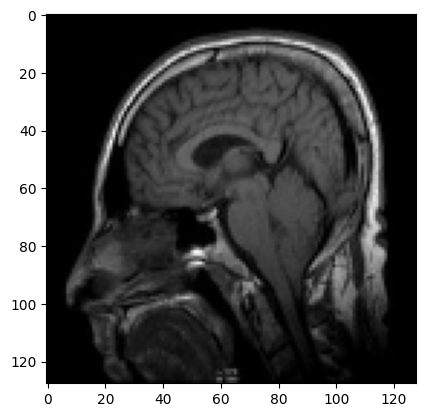

In [3]:
X_train = []
Y_train =[]
image_size = 128
for m in tumor_categories:
    tumor_training_directory = os.path.join(training_set_directory,m)
    for image in os.listdir(tumor_training_directory):
        image_array = cv2.imread(os.path.join(tumor_training_directory, image))
        reshaped_array = cv2.resize(image_array,(image_size,image_size))
        X_train.append(reshaped_array)
        Y_train.append(m)
    
print(X_train[40],Y_train[40])
plt.imshow(X_train[40])
        
x_train = np.array(X_train)
y_train = np.array(Y_train)

no_tumor
(2918, 128, 128, 3) (2918,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

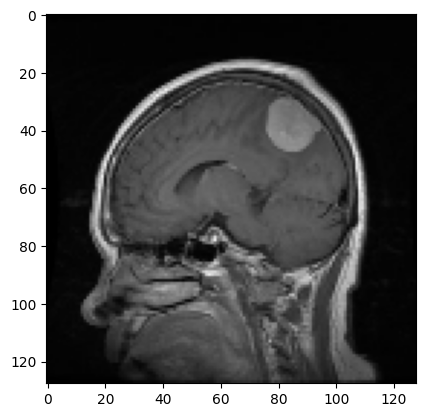

In [4]:

y_train_label = []
print(y_train[120])
plt.imshow(x_train[800])
print(x_train.shape,y_train.shape)
print(type(y_train),type(y_train))
for i in range(len(y_train)): 
    if y_train[i] == 'no_tumor':
        y_train_label.append(0)
    elif y_train[i] == 'meningioma_tumor':
        y_train_label.append(1)
    elif y_train[i] == 'glioma_tumor':
        y_train_label.append(2)
    else:
        y_train_label.append(3)

print(y_train_label)

1
[0. 0. 0. 1.]


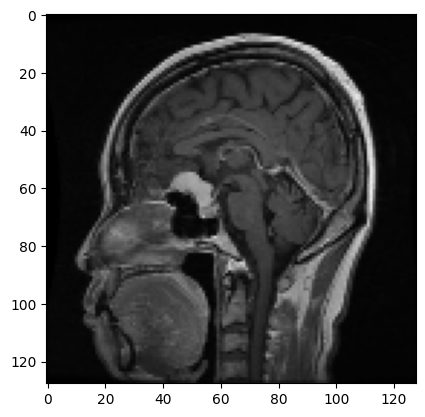

In [5]:
x_train_rand,y_train_rand = shuffle(x_train,y_train_label,random_state=42)
plt.imshow(x_train_rand[150])
print(y_train_rand[150])
y_train_model = tf.keras.utils.to_categorical(y_train_rand,num_classes=4)
print(y_train_model[50])

In [6]:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    '/Users/aravindreddy/Desktop/Brain_Tumour/Training',
    target_size=(299, 299),  
    batch_size=32,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [37]:
custom_model = Sequential()
input_shape =(224,224,3)
custom_model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape, kernel_initializer='random_normal'))
custom_model.add(MaxPooling2D(pool_size = (2,2)))
custom_model.add(Activation('relu'))
custom_model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1,1), padding='valid',activation='relu',kernel_initializer='random_normal'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(1,1), padding='valid',activation='relu',kernel_initializer='random_normal'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Flatten())
custom_model.add(Dense(units=1024, activation='relu',kernel_regularizer=l2(0.01),kernel_initializer='random_normal'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(units=128, activation='relu',kernel_regularizer=l2(0.01),kernel_initializer='random_normal'))
custom_model.add(Dense(units=4, activation='softmax',kernel_initializer='random_normal'))
custom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 activation_2 (Activation)   (None, 111, 111, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 107, 107, 64)      51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 49, 49, 128)      

In [7]:
#inital_learning_rate = 0.001
#optimizer = Adam(learning_rate=inital_learning_rate)
#custom_model.compile(optimizer=Adam(learning_rate=inital_learning_rate), loss= 'categorical_crossentropy', metrics=['Accuracy','Precision'])
'''def learning_rate_scheduler(epoch, lr):
    if epoch <10:
        return lr*1.2
    else:
        return lr

lr_schedule = LearningRateScheduler(learning_rate_scheduler)'''
custom_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['Accuracy','Precision'])
history = custom_model.fit(x_train_rand, y_train_model, epochs=5,batch_size=16,validation_split=0.2)

Epoch 1/5
146/146 [==============================] - 22s 146ms/step - loss: 12.5178 - Accuracy: 0.4662 - precision: 0.5543 - val_loss: 8.6272 - val_Accuracy: 0.6233 - val_precision: 0.7565
Epoch 2/5
146/146 [==============================] - 20s 138ms/step - loss: 7.4659 - Accuracy: 0.6105 - precision: 0.7056 - val_loss: 6.3747 - val_Accuracy: 0.6575 - val_precision: 0.7006
Epoch 3/5
146/146 [==============================] - 20s 137ms/step - loss: 5.6287 - Accuracy: 0.6859 - precision: 0.7554 - val_loss: 4.9352 - val_Accuracy: 0.7260 - val_precision: 0.8254
Epoch 4/5
146/146 [==============================] - 20s 135ms/step - loss: 4.3937 - Accuracy: 0.7639 - precision: 0.8165 - val_loss: 3.8980 - val_Accuracy: 0.7911 - val_precision: 0.8145
Epoch 5/5
146/146 [==============================] - 20s 139ms/step - loss: 3.5031 - Accuracy: 0.8102 - precision: 0.8491 - val_loss: 3.2366 - val_Accuracy: 0.8116 - val_precision: 0.8255


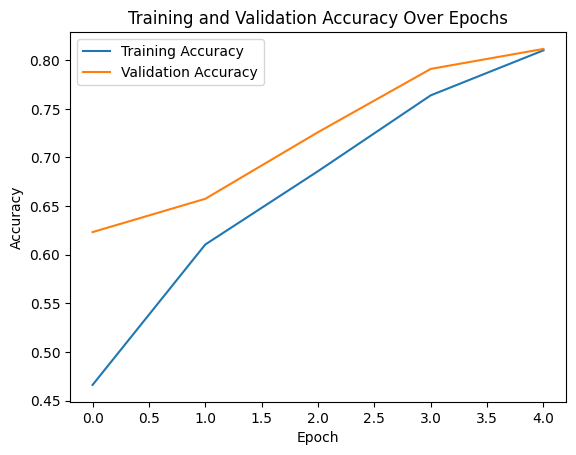

In [8]:
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')


plt.legend()

plt.show()

/Users/aravindreddy/Desktop/Brain_Tumour/Testing/no_tumor
/Users/aravindreddy/Desktop/Brain_Tumour/Testing/meningioma_tumor
/Users/aravindreddy/Desktop/Brain_Tumour/Testing/glioma_tumor
/Users/aravindreddy/Desktop/Brain_Tumour/Testing/pituitary_tumor


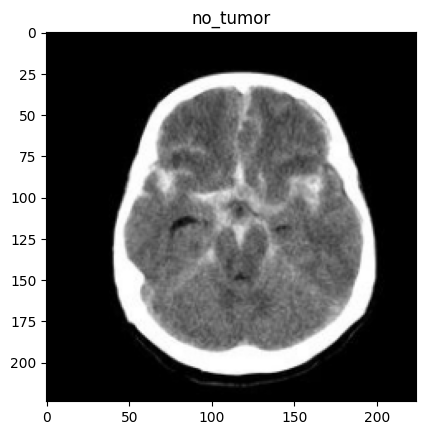

In [19]:
testing_directory ='/Users/aravindreddy/Desktop/Brain_Tumour/Testing'
X_test = []
Y_test =[]
image_size = 224
for m in tumor_categories:
    tumor_testing_directory = os.path.join(testing_directory,m)
    print(tumor_testing_directory)
    for image in os.listdir(tumor_testing_directory):
        image_array = cv2.imread(os.path.join(tumor_testing_directory, image))
        if image_array is None:
            continue 
        else:
            reshaped_array = cv2.resize(image_array,(image_size,image_size))
        X_test.append(reshaped_array)
        Y_test.append(m)
    

plt.imshow(X_test[80])
plt.title(Y_test[80])
        
x_test = np.array(X_test)
y_test = np.array(Y_test)

In [20]:
samples_test={}
y_test_label = []
print(y_test[120])
print(x_test.shape,y_test.shape)
print(type(y_test),type(y_test))
for i in range(len(y_test)): 
    if y_test[i] == 'no_tumor':
        y_test_label.append(0)
    elif y_test[i] == 'meningioma_tumor':
        y_test_label.append(1)
    elif y_test[i] == 'glioma_tumor':
        y_test_label.append(2)
    else:
        y_test_label.append(3)

print(y_test_label)

meningioma_tumor
(392, 224, 224, 3) (392,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [21]:


y_test_model = tf.keras.utils.to_categorical(y_test_label,num_classes=4)
print(y_test_model[149])
print(type(y_test))



[0. 1. 0. 0.]
<class 'numpy.ndarray'>


In [28]:
ftrl_model = tf.keras.models.load_model('/Users/aravindreddy/Desktop/Brain_Tumour/Ftrl_64_0.001.h5')

ftrl_model.evaluate(x_test,y_test_model)
model_results= ftrl_model.predict(x_test)
actual_labels = y_test_label
predicted_labels = np.argmax(model_results, axis=-1)
print(confusion_matrix(actual_labels,predicted_labels))

13/13 [==============================] - 4s 265ms/step
[[104   0   1   0]
 [  7 102   4   2]
 [  6   2  89   1]
 [  3   3   2  66]]


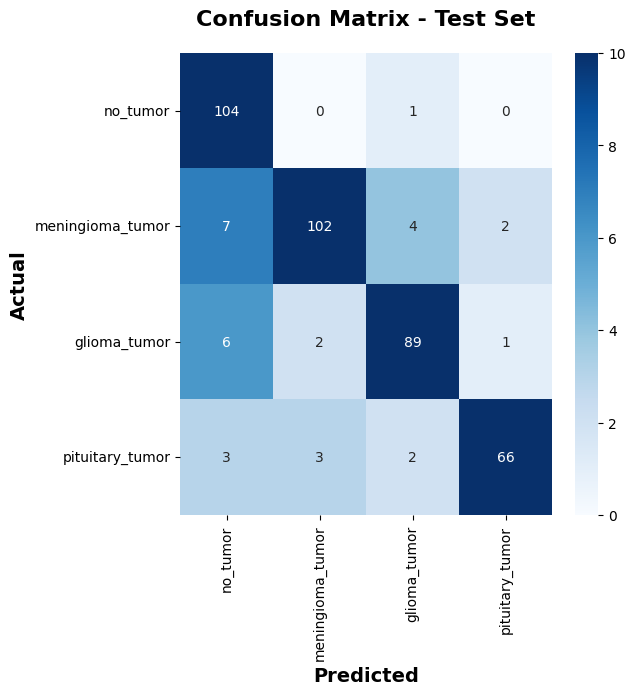

In [35]:

import seaborn as sns
CMatrix = pd.DataFrame(confusion_matrix(actual_labels, predicted_labels), columns=tumor_categories, index =tumor_categories)
plt.figure(figsize=(6, 6)) 
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 10,cmap = 'Blues') 
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold') 
ax.set_xticklabels(ax.get_xticklabels(),rotation =90); 
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);
plt.show()

In [2]:
base_model = InceptionV3(weights='/Users/aravindreddy/Desktop/Brain_Tumour/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(229, 229, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.03)))
model.add(Dense(4, activation='softmax'))  


full_model = Sequential([base_model, model])
full_model.summary()


NameError: name 'InceptionV3' is not defined

In [1]:
full_model.compile(optimizer=Adam(learning_rate=0.01), loss= 'categorical_crossentropy', metrics='accuracy')

full_model.fit(train_generator, epochs=50,batch_size = 16)

NameError: name 'full_model' is not defined

KeyError: 'val_accuracy'

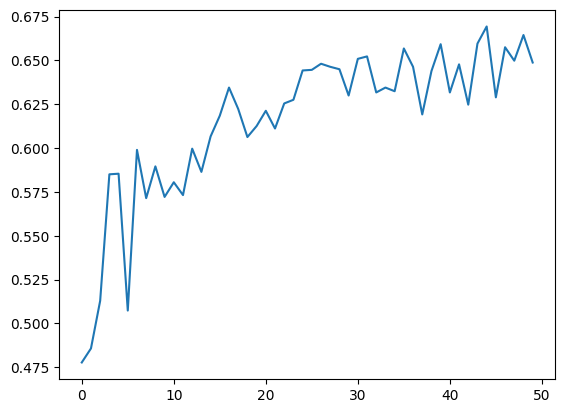

In [79]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')


plt.legend()

plt.show()

In [80]:
full_model.evaluate(x_test,y_test_model)
model_results= full_model.predict(x_test)
actual_labels = y_test_label
predicted_labels = np.argmax(model_results, axis=-1)
print(type(model_results))
plt.imshow(x_test[393])
print(predicted_labels)
print(actual_labels)
print(confusion_matrix(actual_labels,predicted_labels))

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 229, 229, 3), found shape=(None, 128, 128, 3)
